In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
movie=pd.read_csv(r'\Users\abhis\Downloads\Movie_classification.csv')
movie.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [3]:
movie['Genre'].unique()

array(['Thriller', 'Drama', 'Comedy', 'Action'], dtype=object)

In [4]:
X=movie.drop('Start_Tech_Oscar',axis=1)
y=movie['Start_Tech_Oscar']

In [5]:
from sklearn.neighbors import KNeighborsClassifier 

In [6]:
Level_Dict = {'YES': 1, 'NO': 0}
movie['3D_available'] = movie['3D_available'].map(Level_Dict)
movie.head()


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,1,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,0,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,0,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,1,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,0,176.48,225.792,Drama,55,395,72400,1


In [7]:
movie['3D_available'].unique()

array([1, 0], dtype=int64)

In [8]:
movie['Genre'].unique()

array(['Thriller', 'Drama', 'Comedy', 'Action'], dtype=object)

In [9]:
movie=pd.get_dummies(movie,prefix ='Genre',columns  = ['Genre'])

In [10]:
movie=movie.fillna(0)

In [11]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# d1 = pd.DataFrame(ohe.fit_transform(movie['Genre'].values.reshape(-1,1)).toarray(),columns = ['Genre_Thriller','Genre_Drama','Genre_Comedy','Genre_Action'])

# pd.concat([movie,d1],axis = 1)

In [12]:
# sns.pairplot(movie,hue='Start_Tech_Oscar')

In [38]:
X=movie.drop('Start_Tech_Oscar',axis=1)
y=movie['Start_Tech_Oscar']

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
scores = []
for k in range(1,40):
    knn = KNeighborsClassifier(k).fit(X, y)
    scores.append(knn.score(X, y))

print(scores, end = " ")


[1.0, 0.766798418972332, 0.7865612648221344, 0.7490118577075099, 0.7312252964426877, 0.7114624505928854, 0.6857707509881423, 0.6778656126482213, 0.66600790513834, 0.6719367588932806, 0.6620553359683794, 0.6462450592885376, 0.6343873517786561, 0.6304347826086957, 0.6304347826086957, 0.6264822134387352, 0.6185770750988142, 0.6146245059288538, 0.6086956521739131, 0.6225296442687747, 0.6007905138339921, 0.5988142292490118, 0.5928853754940712, 0.6225296442687747, 0.6027667984189723, 0.6106719367588933, 0.5968379446640316, 0.6007905138339921, 0.5909090909090909, 0.5968379446640316, 0.6027667984189723, 0.6047430830039525, 0.5968379446640316, 0.6086956521739131, 0.5869565217391305, 0.6007905138339921, 0.5869565217391305, 0.5988142292490118, 0.6007905138339921] 

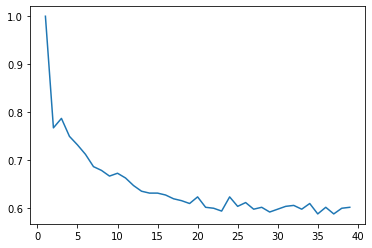

In [17]:
plt.plot(np.arange(1,40), scores);

In [28]:
final_model = KNeighborsClassifier(n_neighbors = 3, metric='minkowski') # creating the object
final_model.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [29]:
sample = np.array([1.5, 5.2, 2.6, 3.5,1,1,1,1,1,1,1,1,1,1,11,1,1,11,1,1,1])
final_model.predict([sample])  # testing 

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [35]:
svc = SVC() # No hyperparameter given means it will use default values (i.e. - C = 1.0 and kernel = 'rbf')
svc.fit(X_train, y_train)

SVC()

In [36]:
svc.score(X_test, y_test)

0.5196850393700787

In [37]:
svc.score(X_train, y_train)

0.554089709762533